In [1]:
# In[2]:Import necessary packages 
import cv2
import matplotlib.pyplot as plt

# In[4]:Set and add the config_file,weights to ur folder.
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

# In[5]:Use a pretrained Dnn model (MobileNet-SSD v3)
model=cv2.dnn_DetectionModel(frozen_model,config_file)

# In[6]:Create a classLabel and print the same
classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

# In[7]:Print the classLabels
print(classLabels)





['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


80
[7]


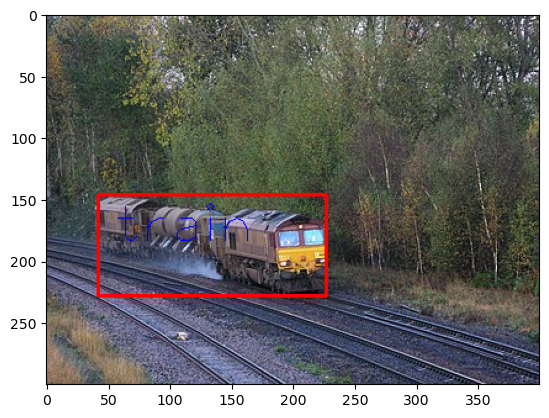

In [5]:

# In[8]:
print(len(classLabels))

# In[9]:Display the image using imshow()
img=cv2.imread('tr.jpg')
plt.imshow(img)


# In[10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


# In[11]:Set the model and Threshold to 0.5
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)


# In[29]:Flatten the index,confidence.
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)


# In[30]:Display the result.
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
